In [ ]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("sweep_data/spinn_sweep_results.csv")

# Keep only finished runs
df_clean = df.dropna(subset=["l2_relative_error"]).copy()

df_clean["time_min"] = df_clean["elapsed_time_s"] / 60


# --- Aggregate statistics (mean/std per hyperparameter combo, ignoring seed) ---
group_cols = ["mlp_type", "n_iters", 
              "n_domain", "activations", "n_fourier_features", "rank"]

agg_df_spinn = df_clean.groupby(group_cols).agg(
    mean_l2=("l2_relative_error", "mean"),
    std_l2=("l2_relative_error", "std"),
    min_l2=("l2_relative_error", "min"),
    max_l2=("l2_relative_error", "max"),
    time_min=("time_min", "mean"),
    iterations_per_s=("iterations_per_sec", "mean")
).reset_index()

# Select numeric columns
l2_cols = ["mean_l2", "std_l2", "min_l2", "max_l2"]
time_cols = ["time_min", "iterations_per_s"]

# Inspect best configs
print("=== Best by mean L2 error ===")
display(
    agg_df_spinn.sort_values("mean_l2").head(20)
    .style
    .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
    .background_gradient(subset=["std_l2"], cmap="Reds")
    .format("{:.2e}", subset=l2_cols)  # format only numeric cols
    .format("{:.2f}", subset=time_cols) 
)

print("\n=== Best by min L2 error (watch for lucky runs) ===")
display(
    agg_df_spinn.sort_values("min_l2").head(20)
    .style
    .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
    .background_gradient(subset=["std_l2"], cmap="Reds")
    .format("{:.2e}", subset=l2_cols)  
    .format("{:.2f}", subset=time_cols)  
)

save_table = False
if save_table:
    #save html table
    styled_mean = (
        agg_df_spinn.sort_values("mean_l2").head(20)
        .style
        .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
        .background_gradient(subset=["std_l2"], cmap="Reds")
        .format("{:.2e}", subset=l2_cols)
        .format("{:.2f}", subset=time_cols)
    )


    # Save as HTML file
    styled_mean.to_html("result_tables/pinn_best_mean.html")

    styled_tex = (
        agg_df_spinn.sort_values("mean_l2").head(10)
        .style
        .format("{:.2e}", subset=l2_cols)
        .format("{:.2f}", subset=time_cols)
    )

    styled_tex.to_latex("spinn_best_mean.tex", hrules=True)

    styled_min = (
        agg_df_spinn.sort_values("min_l2").head(20)
        .style
        .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
        .background_gradient(subset=["std_l2"], cmap="Reds")
        .format("{:.2e}", subset=l2_cols)
        .format("{:.2f}", subset=time_cols)
    )

    # Save as HTML file
    styled_min.to_html("result_tables/spinn_best_min.html")

=== Best by mean L2 error ===


,mlp_type,n_iters,n_domain,activations,n_fourier_features,rank,mean_l2,std_l2,min_l2,max_l2,time_min,iterations_per_s
40,modified-mlp,20000,200**2,sin,128,32,1.08e-03,7.52e-04,2.60e-04,2.08e-03,4.09,408.22
17,mlp,30000,150**2,sin,128,64,1.50e-03,4.51e-04,8.83e-04,1.94e-03,3.93,636.67
26,mlp,30000,200**2,sin,256,32,1.85e-03,1.96e-03,5.58e-04,4.76e-03,4.31,580.84
18,mlp,30000,150**2,sin,256,32,2.15e-03,7.21e-04,1.32e-03,2.97e-03,4.64,541.65
25,mlp,30000,200**2,sin,128,64,2.19e-03,3.76e-04,1.83e-03,2.53e-03,4.39,570.56
16,mlp,30000,150**2,sin,128,32,2.22e-03,1.55e-03,5.06e-04,4.24e-03,4.08,613.78
24,mlp,30000,200**2,sin,128,32,2.25e-03,1.11e-03,9.30e-04,3.20e-03,4.58,549.16
48,modified-mlp,30000,150**2,sin,128,32,2.28e-03,2.43e-03,4.83e-04,5.85e-03,6.54,384.18
27,mlp,30000,200**2,sin,256,64,2.38e-03,1.48e-03,7.38e-04,4.34e-03,4.10,612.93
44,modified-mlp,20000,200**2,tanh,128,32,2.39e-03,1.42e-03,1.16e-03,4.20e-03,3.89,428.33



=== Best by min L2 error (watch for lucky runs) ===


,mlp_type,n_iters,n_domain,activations,n_fourier_features,rank,mean_l2,std_l2,min_l2,max_l2,time_min,iterations_per_s
40,modified-mlp,20000,200**2,sin,128,32,1.08e-03,7.52e-04,2.60e-04,2.08e-03,4.09,408.22
46,modified-mlp,20000,200**2,tanh,256,32,4.49e-02,8.49e-02,3.47e-04,1.72e-01,4.27,390.14
57,modified-mlp,30000,200**2,sin,128,64,7.62e-03,1.25e-02,3.72e-04,2.62e-02,5.90,425.11
34,modified-mlp,20000,150**2,sin,256,32,1.27e-02,1.45e-02,3.87e-04,2.98e-02,4.12,404.71
37,modified-mlp,20000,150**2,tanh,128,64,8.36e-03,1.46e-02,4.00e-04,3.03e-02,3.86,432.49
29,mlp,30000,200**2,tanh,128,64,2.87e-03,2.60e-03,4.06e-04,5.93e-03,4.02,623.25
45,modified-mlp,20000,200**2,tanh,128,64,7.93e-03,8.56e-03,4.75e-04,2.00e-02,4.36,382.38
48,modified-mlp,30000,150**2,sin,128,32,2.28e-03,2.43e-03,4.83e-04,5.85e-03,6.54,384.18
16,mlp,30000,150**2,sin,128,32,2.22e-03,1.55e-03,5.06e-04,4.24e-03,4.08,613.78
33,modified-mlp,20000,150**2,sin,128,64,4.67e-03,6.00e-03,5.07e-04,1.33e-02,4.09,407.62


/tmp/ipykernel_2264919/1344327477.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([r"modif", r"std"], rotation=0)
/tmp/ipykernel_2264919/1344327477.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(["20k", "30k"])


Fig width: 9.0, set it to 3.00 < 6.34 (A4 with margins) in latex to have a printed font size of 6.00 for titles and 5.00 for the axis


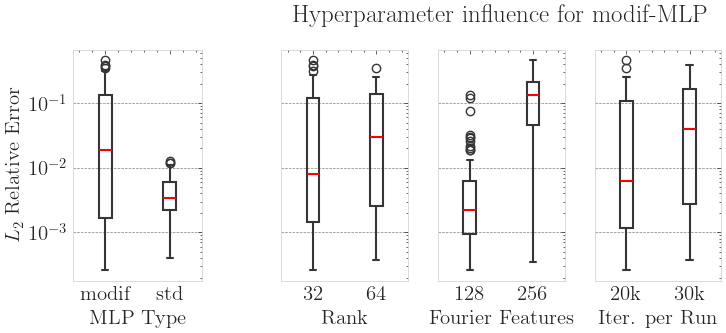

In [8]:
import scienceplots  # optional, requires latex
plt.style.use(['science', 'grid'])

# --- Font size for printing ---
plotting_factor = 3
font_factor = 3
title_font_size = 6
axes_font_size = 5
plt.rcParams.update({
    "font.size": title_font_size*font_factor,
    "figure.titlesize": title_font_size*font_factor,
    "axes.titlesize": title_font_size*font_factor,
    "axes.labelsize": axes_font_size*font_factor,
    "xtick.labelsize": axes_font_size*font_factor,
    "ytick.labelsize": axes_font_size*font_factor,
    "legend.fontsize": axes_font_size*font_factor,
})

# --- Visualization helper ---
def plot_distribution(ax, df, parameter, plot_type="violinplot", strip=False, ylabel="L2 Relative Error", log_scale=True):
    if plot_type == "violinplot":
        sns.violinplot(data=df, x=parameter, y="l2_relative_error", ax=ax, inner=None)
    else:
        sns.boxplot(data=df, x=parameter, y="l2_relative_error", ax=ax, width=0.2, boxprops={'facecolor':'None'}, medianprops={'color':'red'}, linewidth=1.5)
         #sns.boxplot(data=df, x=parameter, y="l2_relative_error", ax=ax) --- IGNORE ---
    if strip:
        sns.stripplot(data=df, x=parameter, y="l2_relative_error", ax=ax, 
                      color="black", size=3, jitter=True, alpha=0.7)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(parameter)
    if log_scale:
        ax.set_yscale("log")


# # --- Make comparison plots ---
# # sns.set_style("whitegrid")
# fig = plt.figure(figsize=(6, 3), dpi=100)
# grid = plt.GridSpec(1, 3, width_ratios=[1, 1, 1], figure=fig)

# plot_type = "boxplot"  # or "boxplot"

# # Activation function comparison
# ax1 = plt.subplot(grid[0, 0])
# plot_distribution(ax1, df_clean, parameter="activations", plot_type=plot_type,ylabel=r"$L_2$ Relative Error")
# # ax1.set_title("Activation influence")
# # ax1.set_yticklabels([])

# # Fourier features comparison
# ax2 = plt.subplot(grid[0, 1])
# plot_distribution(ax2, df_clean, parameter="n_fourier_features", plot_type=plot_type, ylabel="")
# # ax2.set_title("Fourier features influence")
# ax2.set_yticklabels([])

# # MLP type comparison
# ax3 = plt.subplot(grid[0, 2])
# plot_distribution(ax3, df_clean, parameter="mlp_type", plot_type=plot_type, ylabel="")
# # ax3.set_title("MLP type influence")
# ax3.set_yticklabels([])
# ax3.set_xticklabels([r"modif", r"std"], rotation=0)
# ax3.set_xlabel("MLP Type")

# plt.tight_layout()
# plt.show()

# --- Modif-MLP study ---
# Filter for Modif-MLP only
df_modif = df_clean[df_clean["mlp_type"] == "modified-mlp"]
sns.set_style("whitegrid")
fig = plt.figure(figsize=(9, 3), dpi=100)
grid = plt.GridSpec(1, 4, width_ratios=[1.8, 1, 1, 1], figure=fig)
plot_type = "boxplot"  # or "boxplot"

plt.style.use(['science', 'grid'])

# # MLP type comparison
ax1 = plt.subplot(grid[0, 0])
plot_distribution(ax1, df_clean, parameter="mlp_type", plot_type=plot_type,ylabel=r"$L_2$ Relative Error")
ax1.set_aspect(aspect=1)
# ax1.set_title("MLP type influence")
ax1.set_xticklabels([r"modif", r"std"], rotation=0)
ax1.set_xlabel("MLP Type")


# rank comparison
ax2 = plt.subplot(grid[0, 1])
plot_distribution(ax2, df_modif, parameter="rank", plot_type=plot_type, ylabel="")
# ax2.set_title("Rank influence")
ax2.set_yticklabels([])
ax2.set_xlabel("Rank")


# n_fourier_features comparison
ax3 = plt.subplot(grid[0, 2])
plot_distribution(ax3, df_modif, parameter="n_fourier_features", plot_type=plot_type, ylabel="")
# ax3.set_title("Fourier features influence")
ax3.set_yticklabels([])
ax3.set_xlabel("Fourier Features")
ax3.set_title("Hyperparameter influence for modif-MLP", pad=20, fontsize=title_font_size * font_factor)
# n_iters comparison
ax4 = plt.subplot(grid[0, 3])
plot_distribution(ax4, df_modif, parameter="n_iters", plot_type=plot_type, ylabel="")
# ax4.set_title("Training iterations influence")
ax4.set_yticklabels([])
ax4.set_xticklabels(["20k", "30k"])
ax4.set_xlabel("Iter. per Run")

print(f"Fig width: {fig.get_figwidth()}, set it to {fig.get_figwidth()/font_factor:.2f} < 6.34 (A4 with margins) in latex to have a printed font size of {title_font_size:.2f} for titles and {axes_font_size:.2f} for the axis")
plt.show()

fig.savefig("figures/spinn_modif_hyperparameter_influence.png", dpi=300)

## PINN results

In [ ]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("sweep_data/pinn_sweep_results.csv")

# Keep only finished runs
df_clean = df.dropna(subset=["l2_relative_error"]).copy()

df_clean["time_min"] = df_clean["elapsed_time_s"] / 60


# --- Aggregate statistics (mean/std per hyperparameter combo, ignoring seed) ---
group_cols = ["n_iters", "activations", "n_fourier_features"]

agg_df_pinn = df_clean.groupby(group_cols).agg(
    n_domain=("n_domain", "first"),  # n_domain is constant within groups
    
    mean_l2=("l2_relative_error", "mean"),
    std_l2=("l2_relative_error", "std"),
    min_l2=("l2_relative_error", "min"),
    max_l2=("l2_relative_error", "max"),
    time_min=("time_min", "mean"),
    iterations_per_s=("iterations_per_sec", "mean")
).reset_index()

# Select numeric columns
l2_cols = ["mean_l2", "std_l2", "min_l2", "max_l2"]
time_cols = ["time_min", "iterations_per_s"]

# Inspect best configs
print("=== Best by mean L2 error ===")
display(
    agg_df_pinn.sort_values("mean_l2").head(20)
    .style
    .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
    .background_gradient(subset=["std_l2"], cmap="Reds")
    .format("{:.2e}", subset=l2_cols)  # format only numeric cols
    .format("{:.2f}", subset=time_cols) 
)

#save html table
styled_mean = (
    agg_df_pinn.sort_values("mean_l2").head(20)
    .style
    .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
    .background_gradient(subset=["std_l2"], cmap="Reds")
    .format("{:.2e}", subset=l2_cols)
    .format("{:.2f}", subset=time_cols)
)


# Save as HTML file
styled_mean.to_html("result_tables/pinn_best_mean.html")

=== Best by mean L2 error ===


,n_iters,activations,n_fourier_features,n_domain,mean_l2,std_l2,min_l2,max_l2,time_min,iterations_per_s
5,30000,sin,256,150**2,1.63e-04,1.32e-05,1.51e-04,1.81e-04,8.93,280.06
7,30000,tanh,256,150**2,1.67e-04,1.17e-05,1.55e-04,1.83e-04,8.72,286.57
1,20000,sin,256,150**2,1.96e-04,5.73e-05,1.59e-04,2.80e-04,6.15,271.07
3,20000,tanh,256,150**2,1.96e-04,3.66e-05,1.60e-04,2.47e-04,5.98,278.92
6,30000,tanh,128,150**2,2.37e-04,5.44e-05,1.92e-04,3.11e-04,6.22,402.23
4,30000,sin,128,150**2,4.29e-04,2.10e-04,2.77e-04,7.32e-04,6.43,388.80
2,20000,tanh,128,150**2,6.91e-04,4.48e-04,2.78e-04,1.23e-03,4.29,388.81
0,20000,sin,128,150**2,9.13e-04,5.32e-04,4.92e-04,1.67e-03,4.46,374.06


## Fourier features comparison

In [ ]:
from allen_cahn_train import train_allen_cahn

config_spinn = {
    "fourier_features": False,
    "n_fourier_features": 128,
    "sigma": 10,
    "net_type": "SPINN",
    "mlp_type": "mlp",
    "activations": "sin",
    "n_domain": 150**2,
    "n_iters": 30000,
    "rank": 64,
    "seed": 0,
}

config_spinn_modified_mlp = {
    "fourier_features": False,
    "n_fourier_features": 128,
    "sigma": 10,
    "net_type": "SPINN",
    "mlp_type": "modified-mlp",
    "activations": "sin",
    "n_domain": 200**2,
    "n_iters": 20000,
    "rank": 32,
    "seed": 0,
}

config_pinn = {
    "fourier_features": False,
    "n_fourier_features": 256,
    "sigma": 10,
    "net_type": "PINN",
    "activations": "sin",
    "n_domain": 150**2,
    "n_iters": 30000,
    "seed": 0,
}

data_spinn = train_allen_cahn(config_spinn)
data_spinn_modified_mlp = train_allen_cahn(config_spinn_modified_mlp)
data_pinn = train_allen_cahn(config_pinn)

In [17]:
best_spinn_mlp = agg_df_spinn[(agg_df_spinn["mlp_type"] == "mlp")].sort_values("mean_l2").head(1)
best_spinn_mlp["mlp_type"] = "spinn"
best_spinn_modif_mlp = agg_df_spinn[(agg_df_spinn["mlp_type"] == "modified-mlp")].sort_values("mean_l2").head(1)
best_spinn_modif_mlp["mlp_type"] = "spinn-modif"
best_pinn = agg_df_pinn.sort_values("mean_l2").head(1)
best_pinn["mlp_type"] = "pinn"

spinn_mlp_no_fourier = best_spinn_mlp.copy()
spinn_mlp_no_fourier["n_fourier_features"] = 0
spinn_mlp_no_fourier["mean_l2"] = data_spinn["l2_error"]
spinn_mlp_no_fourier["std_l2"] = 0.0
spinn_mlp_no_fourier["min_l2"] = data_spinn["l2_error"]
spinn_mlp_no_fourier["max_l2"] = data_spinn["l2_error"]
spinn_mlp_no_fourier["time_min"] = data_spinn["elapsed_time"] / 60
spinn_mlp_no_fourier["iterations_per_s"] = data_spinn["iterations_per_sec"]

spinn_modif_mlp_no_fourier = best_spinn_modif_mlp.copy()
spinn_modif_mlp_no_fourier["n_fourier_features"] = 0
spinn_modif_mlp_no_fourier["mean_l2"] = data_spinn_modified_mlp["l2_error"]
spinn_modif_mlp_no_fourier["std_l2"] = 0.0
spinn_modif_mlp_no_fourier["min_l2"] = data_spinn_modified_mlp["l2_error"]
spinn_modif_mlp_no_fourier["max_l2"] = data_spinn_modified_mlp["l2_error"]
spinn_modif_mlp_no_fourier["time_min"] = data_spinn_modified_mlp["elapsed_time"] / 60
spinn_modif_mlp_no_fourier["iterations_per_s"] = data_spinn_modified_mlp["iterations_per_sec"]

pinn_no_fourier = best_pinn.copy()
pinn_no_fourier["n_fourier_features"] = 0
pinn_no_fourier["mean_l2"] = data_pinn["l2_error"]
pinn_no_fourier["std_l2"] = 0.0
pinn_no_fourier["min_l2"] = data_pinn["l2_error"]
pinn_no_fourier["max_l2"] = data_pinn["l2_error"]
pinn_no_fourier["time_min"] = data_pinn["elapsed_time"] / 60
pinn_no_fourier["iterations_per_s"] = data_pinn["iterations_per_sec"]

table_fourier_results = pd.concat([best_spinn_mlp, best_spinn_modif_mlp, best_pinn, spinn_mlp_no_fourier, spinn_modif_mlp_no_fourier, pinn_no_fourier], ignore_index=True)
table_fourier_results = table_fourier_results.sort_values("mean_l2")

print("=== Best results including no Fourier features runs ===")
display(
    table_fourier_results
    .style
    .background_gradient(subset=["mean_l2", "min_l2", "max_l2"], cmap="Greens_r")
    .background_gradient(subset=["std_l2"], cmap="Reds")
    .format("{:.2e}", subset=l2_cols)  # format only numeric cols
    .format("{:.2f}", subset=time_cols) 
)

=== Best results including no Fourier features runs ===


,mlp_type,n_iters,n_domain,activations,n_fourier_features,rank,mean_l2,std_l2,min_l2,max_l2,time_min,iterations_per_s
2,pinn,30000,150**2,sin,256,nan,1.63e-04,1.32e-05,1.51e-04,1.81e-04,8.93,280.06
1,spinn-modif,20000,200**2,sin,128,32.000000,1.08e-03,7.52e-04,2.60e-04,2.08e-03,4.09,408.22
0,spinn,30000,150**2,sin,128,64.000000,1.50e-03,4.51e-04,8.83e-04,1.94e-03,3.93,636.67
5,pinn,30000,150**2,sin,0,nan,8.61e-02,0.00e+00,8.61e-02,8.61e-02,2.11,1185.98
4,spinn-modif,20000,200**2,sin,0,32.000000,1.15e-01,0.00e+00,1.15e-01,1.15e-01,4.76,350.43
3,spinn,30000,150**2,sin,0,64.000000,6.10e-01,0.00e+00,6.10e-01,6.10e-01,3.41,733.20
